![example](images/director_shot.jpeg)

# Movie Advice for Microsoft

**Author:** N Bisgin
***

## Overview

This project aims to give advice to Microsoft (hypothetically) on which types of movies to create for their new movie studio based on data from IMDB, TMDB, BOM and TN. The data is provided by Flatiron school and collected from the respective websites. 

Using explatory data analysis, I tried to understand what are some important factors for being successful in the industry.

## Business Problem

***
Questions to consider:
* What are the business's pain points related to this project?

    The business needs general overview about the movie industry. 
    
* How did you pick the data analysis question(s) that you did?

    I believe deciding on the movie genre and the people to work with for the movie are important factors and is a good starting point for a new movie studio. Given the data, I think ratings and profit are good measures of success for a movie.
    
* Why are these questions important from a business perspective?

    If we understand which genres are more profitable and have higher ratings, the business can invest in those kind of movies. 
***

## Data Understanding

***
Questions to consider:

* Where did the data come from, and how do they relate to the data analysis questions?

The data is collected from Box Office Mojo, IMDB, Rotten Tomatoes, and TheMovieDB.org. The data has information about movie titles, genres, directors, actors, profits, release year.

* What do the data represent? Who is in the sample and what variables are included?

The data provides information about 16184 movies when merged on common columns. I have included information about movie genres, profit, primary people such as directors, writers and actors along with ratings.

* What is the target variable?

Target variables are the ratings and profit.

***

In [306]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [307]:
# Here you run your code to explore the data
bom_movie_gross = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
imdb_name_basics = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
imdb_title_akas = pd.read_csv('data/zippedData/imdb.title.akas.csv.gz')
imdb_title_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
imdb_title_crew = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
imdb_title_principals = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')
imdb_title_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
#rt_movie_info = pd.read_csv('data/zippedData/rt.movie_info.tsv.gz')
#rt_reviews = pd.read_csv('data/zippedData/rt.reviews.tsv.gz')
tmdb_movies = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
tn_movie_budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')

In [308]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [309]:
imdb_name_basics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [310]:
imdb_title_akas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [311]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [312]:
imdb_title_crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [313]:
imdb_title_principals.head() 

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [314]:
imdb_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [315]:
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [316]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Data Preparation

**Here are the datasets that I used for analysis:**
    
imdb datasets: imdb_title_basics, imdb_title_crew, imdb_title_principals, imdb_title_ratings, imdb_name_basics

tmdb dataset: tmdb_movies

bom dataset: bom_movie_gross

tn dataset: tn_movie_budgets

In [317]:
# I merged imdb related datasets on the value 'tconst'
imdb1 = pd.merge(imdb_title_basics,imdb_title_crew, how='inner',on='tconst')
imdb2 = pd.merge(imdb_title_principals, imdb_title_ratings, how='inner',on='tconst')
imdb3 = pd.merge(imdb1,imdb2, how='inner',on='tconst')

# One of the imdb datasets, imdb name basics, did not have the value 'tconst', 
# but had another value 'nconst', so I merged it on 'nconst'
imdb = pd.merge(imdb_name_basics,imdb3, how='inner',on='nconst')

# tmbd data did not have either value (tconst or nconst), 
# so I merged it using the 'original_title'
itmb = pd.merge(tmdb_movies,imdb, how='inner',on='original_title')
itmb.head(3)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,...,runtime_minutes,genres,directors,writers,ordering,category,job,characters,averagerating,numvotes
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,...,146.0,"Adventure,Fantasy,Mystery",nm0946734,"nm0460141,nm0746830",6,writer,screenplay,NaN,7.7,425530
1,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,...,146.0,"Adventure,Fantasy,Mystery",nm0946734,"nm0460141,nm0746830",3,actor,NaN,"[""Ron Weasley""]",7.7,425530
2,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,...,146.0,"Adventure,Fantasy,Mystery",nm0946734,"nm0460141,nm0746830",7,writer,"novel ""Harry Potter and the Deathly Hallows",NaN,7.7,425530


***
Questions to consider:
* Were there variables you dropped?
    
    I dropped the following columns from the data:

        original_title, primary_title, Unnamed: 0, genre_ids, id, nconst, tconst,
        original_language, release_date, start_year, birth_year, death_year, 
        known_for_titles,  'category', 'job', 'characters', 
        'vote_count', 'runtime_minutes', 'ordering'

***

In [318]:
itmb.drop(['original_title','primary_title','Unnamed: 0','genre_ids','id','original_language','release_date','known_for_titles','nconst','tconst','start_year','birth_year','death_year','vote_count','runtime_minutes','category','job','characters','ordering'], axis=1,inplace=True)
itmb.head(3)

,popularity,title,vote_average,primary_name,primary_profession,genres,directors,writers,averagerating,numvotes
0,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,Steve Kloves,"writer,producer,director","Adventure,Fantasy,Mystery",nm0946734,"nm0460141,nm0746830",7.7,425530
1,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,Rupert Grint,"actor,producer,soundtrack","Adventure,Fantasy,Mystery",nm0946734,"nm0460141,nm0746830",7.7,425530
2,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,J.K. Rowling,"writer,producer,soundtrack","Adventure,Fantasy,Mystery",nm0946734,"nm0460141,nm0746830",7.7,425530


In [319]:
# I merged the bom_movie_gross data using movie titles

itmbom = pd.merge(bom_movie_gross,itmb, how='inner',on='title')
itmbom.head(3)

,title,studio,domestic_gross,foreign_gross,year,popularity,vote_average,primary_name,primary_profession,genres,directors,writers,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,24.445,7.7,Joan Cusack,"actress,soundtrack,writer","Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",8.3,682218
1,Toy Story 3,BV,415000000.0,652000000,2010,24.445,7.7,John Lasseter,"producer,writer,director","Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",8.3,682218
2,Toy Story 3,BV,415000000.0,652000000,2010,24.445,7.7,Tom Hanks,"producer,actor,soundtrack","Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",8.3,682218


In [320]:
itmbomtn = pd.merge(itmbom, tn_movie_budgets, how='inner',left_on='title', right_on='movie')
itmbomtn.head(3)

,title,studio,domestic_gross_x,foreign_gross,year,popularity,vote_average,primary_name,primary_profession,genres,directors,writers,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,24.445,7.7,Joan Cusack,"actress,soundtrack,writer","Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",8.3,682218,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Toy Story 3,BV,415000000.0,652000000,2010,24.445,7.7,John Lasseter,"producer,writer,director","Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",8.3,682218,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
2,Toy Story 3,BV,415000000.0,652000000,2010,24.445,7.7,Tom Hanks,"producer,actor,soundtrack","Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",8.3,682218,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"


In [321]:
# domestic_gross is an object (str), needs to be converted to integer and get rid of '$' sign and comma
itmbomtn['worldwide_gross'] = itmbomtn['worldwide_gross'].str.replace(',','').str.replace('$','').astype(int)
itmbomtn['worldwide_gross'].head()

0    1068879522
1    1068879522
2    1068879522
3    1068879522
4    1068879522
Name: worldwide_gross, dtype: int64

In [322]:
# production_budget is an object (str), needs to be converted to integer and get rid of '$' sign and comma
itmbomtn['production_budget'] = itmbomtn['production_budget'].str.replace(',','').str.replace('$','').astype(int)
itmbomtn['production_budget'].head()

0    200000000
1    200000000
2    200000000
3    200000000
4    200000000
Name: production_budget, dtype: int64

***
Questions to consider:
* Were there variables you created?
       
       I created a value 'profit', which is simply the worldwide_gross minus production_cost.
       
* How did you address missing values or outliers?

        I dropped rows with missing worldwide_gross or production_cost values.
        
* Why are these choices appropriate given the data and the business problem?

        Dropping the nan values, rather than replacing them is an appropriate choice, since I want to provide accurate information.
        
* Were there variables you dropped?

        I later dropped studio, year, domestic_gross, foreign_gross, worldwide_gross columns, since they are not necessary for further analysis.
***

In [324]:
itmbomtn = itmbomtn.dropna(subset=['worldwide_gross', 'production_budget'])
itmbomtn['profit']=itmbomtn['worldwide_gross']-itmbomtn['production_budget']
itmbomtn.drop(['studio','year','domestic_gross_x','domestic_gross_y','worldwide_gross','foreign_gross','production_budget'], axis=1,inplace=True)
itmbomtn.head(3)

,title,popularity,vote_average,primary_name,primary_profession,genres,directors,writers,averagerating,numvotes,id,release_date,movie,profit
0,Toy Story 3,24.445,7.7,Joan Cusack,"actress,soundtrack,writer","Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",8.3,682218,47,"Jun 18, 2010",Toy Story 3,868879522
1,Toy Story 3,24.445,7.7,John Lasseter,"producer,writer,director","Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",8.3,682218,47,"Jun 18, 2010",Toy Story 3,868879522
2,Toy Story 3,24.445,7.7,Tom Hanks,"producer,actor,soundtrack","Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",8.3,682218,47,"Jun 18, 2010",Toy Story 3,868879522


In [384]:
itmbomtn.shape

(16184, 14)

## Data Modeling

***
Questions to consider:
* How did you analyze or model the data?

    I wanted to understand the profitability of different genres of movies.
    I also wanted to analyze the change of ratings for different genres. I checked both imdb and tmdb ratings.
    
    Secondly, I wanted to find out whom Microsoft should work with for the best profit. Which directors, writers or actors are deriving the most profitable movies and which of them have the best ratings?
    
    
* How did you iterate on your initial approach to make it better?

    I used the domestic_gross and foreign_gross to calculate the profit at my first attempt. Then, I found out the information about production_budget, so I included that in the calculation to get a better result.
    
* Why are these choices appropriate given the data and the business problem?

    I think deciding the genres of the movie and whom to work with based on the profit and ratings is a good step for a first attempt at creating a new movie studio. This will give an general sense of the indsutry.
***

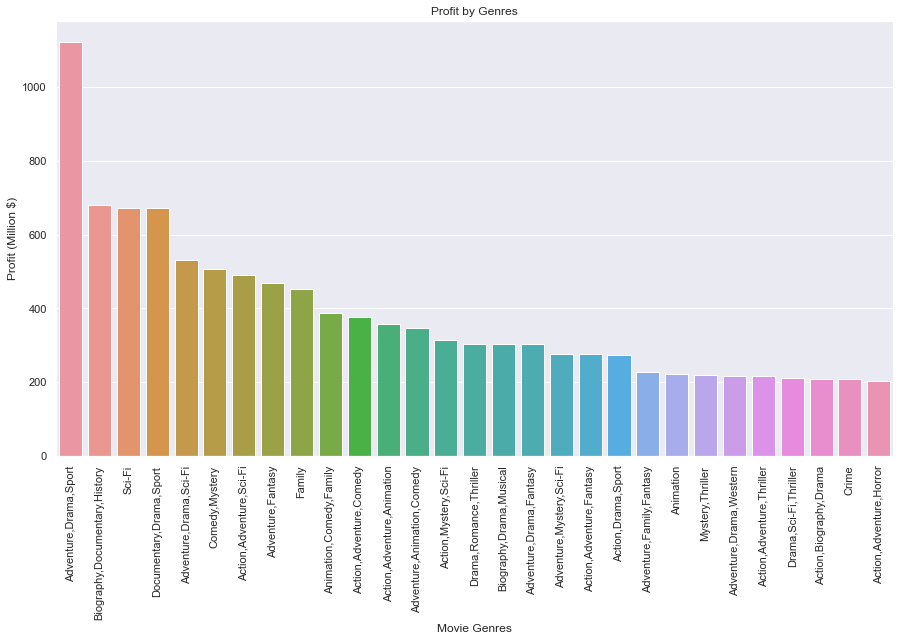

In [353]:
df1 = itmbomtn.groupby('genres').mean().sort_values(['profit'],ascending=False)
tg = df1[df1['profit']>0.2*(10**9)]
tg1 = tg.reset_index()
tg1 ['profit'] = tg1['profit']/(10**6)
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x='genres',y='profit',data=tg1)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(xlabel = "Movie Genres", ylabel = "Profit (Million $)", title = 'Profit by Genres')
None #don't show the label objects

In [385]:
tg1.genres.head(10)

0            Adventure,Drama,Sport
1    Biography,Documentary,History
2                           Sci-Fi
3          Documentary,Drama,Sport
4           Adventure,Drama,Sci-Fi
5                   Comedy,Mystery
6          Action,Adventure,Sci-Fi
7                Adventure,Fantasy
8                           Family
9          Animation,Comedy,Family
Name: genres, dtype: object

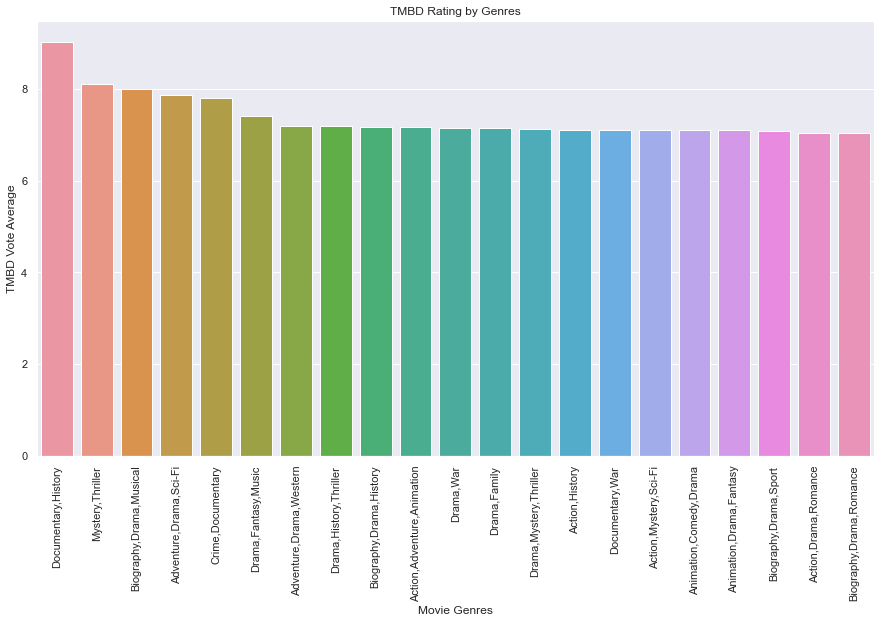

In [358]:
df2 = itmbomtn.groupby('genres').mean().sort_values(['vote_average'],ascending=False)
va = df2[df2['vote_average']>7]
va1 = va.reset_index()
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x='genres',y='vote_average',data=va1)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(xlabel = "Movie Genres", ylabel = "TMBD Vote Average", title = 'TMBD Rating by Genres')
None #don't show the label objects

In [388]:
va1.genres.head(10)

0           Documentary,History
1              Mystery,Thriller
2       Biography,Drama,Musical
3        Adventure,Drama,Sci-Fi
4             Crime,Documentary
5           Drama,Fantasy,Music
6       Adventure,Drama,Western
7        Drama,History,Thriller
8       Biography,Drama,History
9    Action,Adventure,Animation
Name: genres, dtype: object

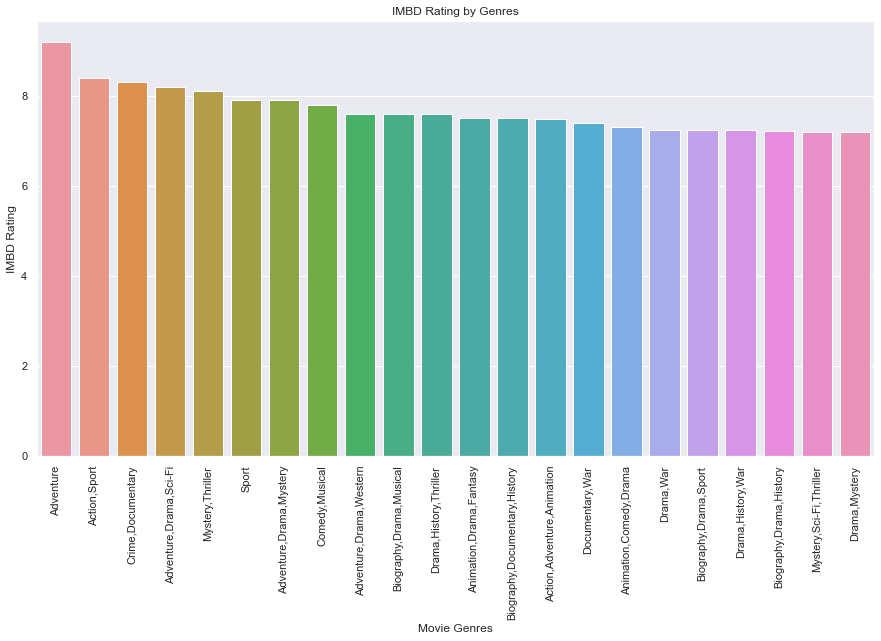

In [361]:
df3 = itmbomtn.groupby('genres').mean().sort_values(['averagerating'],ascending=False)
ar = df3[df3['averagerating']>7.2]
ar1 = ar.reset_index()
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x='genres',y='averagerating',data=ar1)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(xlabel = "Movie Genres", ylabel = "IMBD Rating", title = 'IMBD Rating by Genres')
None #don't show the label objects

In [389]:
ar1.genres.head(10)

0                  Adventure
1               Action,Sport
2          Crime,Documentary
3     Adventure,Drama,Sci-Fi
4           Mystery,Thriller
5                      Sport
6    Adventure,Drama,Mystery
7             Comedy,Musical
8    Adventure,Drama,Western
9    Biography,Drama,Musical
Name: genres, dtype: object

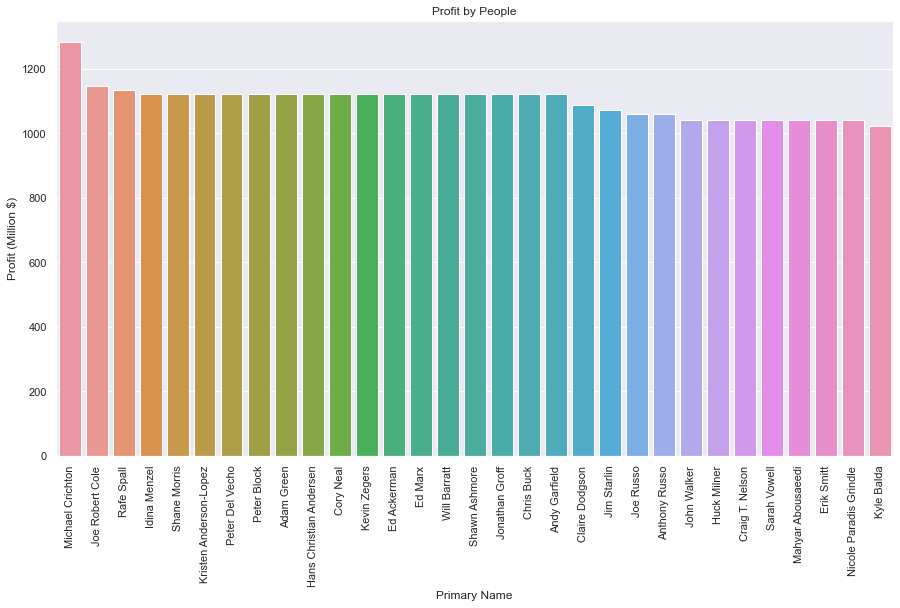

In [363]:
df4 = itmbomtn.groupby('primary_name').mean().sort_values(['profit'],ascending=False)
tg2 = df4[df4['profit']>1*(10**9)]
tg2 = tg2.reset_index()
tg2 ['profit'] = tg2['profit']/(10**6)
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x='primary_name',y='profit',data=tg2)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(xlabel = "Primary Name", ylabel = "Profit (Million $)", title = 'Profit by People')
None #don't show the label objects

In [387]:
tg2.primary_name.head(10)

0           Michael Crichton
1            Joe Robert Cole
2                 Rafe Spall
3               Idina Menzel
4               Shane Morris
5     Kristen Anderson-Lopez
6            Peter Del Vecho
7                Peter Block
8                 Adam Green
9    Hans Christian Andersen
Name: primary_name, dtype: object

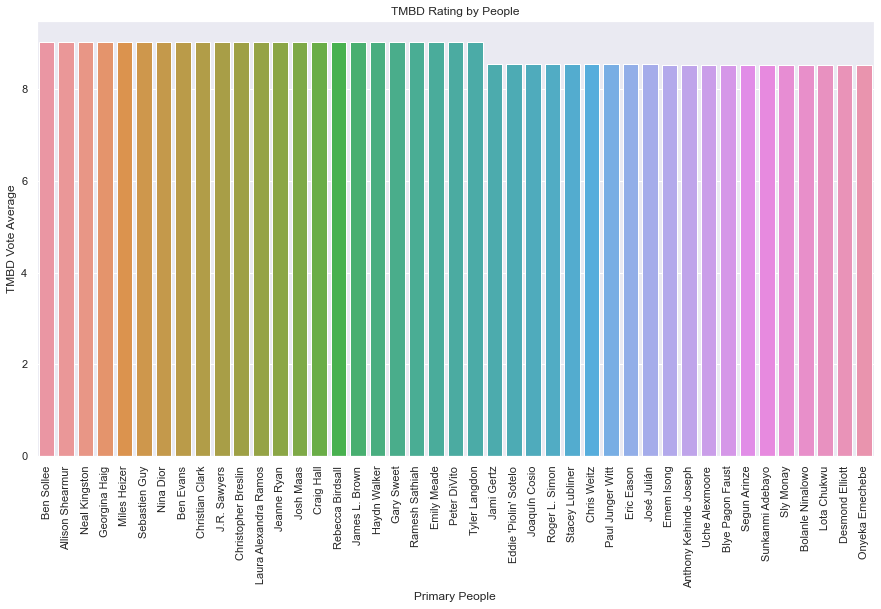

In [370]:
df5 = itmbomtn.groupby('primary_name').mean().sort_values(['vote_average'],ascending=False)
va2 = df5[df5['vote_average']>8.5]
va2 = va2.reset_index()
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x='primary_name',y='vote_average',data=va2)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(xlabel = "Primary People", ylabel = "TMBD Vote Average", title = 'TMBD Rating by People')
None #don't show the label objects

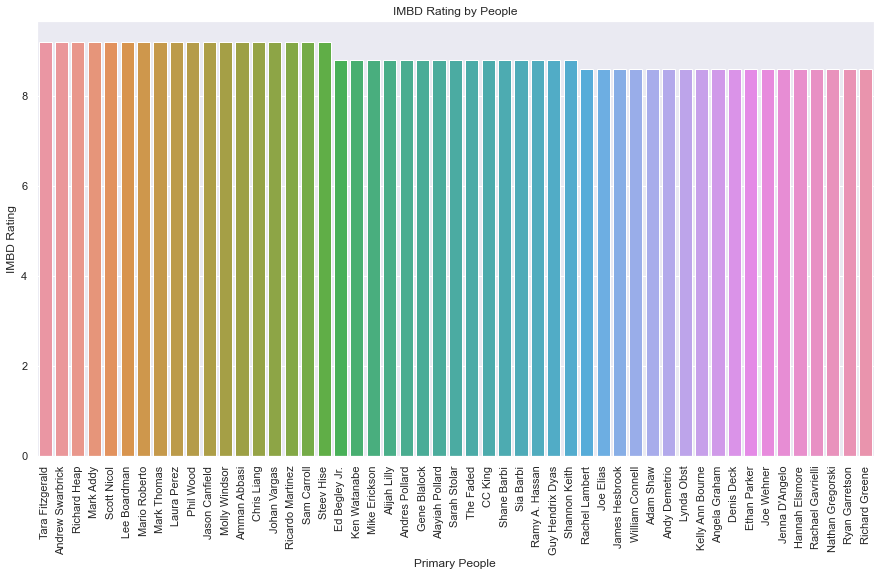

In [371]:
df6 = itmbomtn.groupby('primary_name').mean().sort_values(['averagerating'],ascending=False)
ar2 = df6[df6['averagerating']>8.5]
ar2 = ar2.reset_index()
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x='primary_name',y='averagerating',data=ar2)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(xlabel = "Primary People", ylabel = "IMBD Rating", title = 'IMBD Rating by People')
None #don't show the label objects

In [390]:
va2.primary_name.head(10)

0          Ben Sollee
1    Allison Shearmur
2       Neal Kingston
3       Georgina Haig
4        Miles Heizer
5       Sebastien Guy
6           Nina Dior
7           Ben Evans
8     Christian Clark
9        J.R. Sawyers
Name: primary_name, dtype: object

In [391]:
ar2.primary_name.head(10)

0     Tara Fitzgerald
1    Andrew Swarbrick
2        Richard Heap
3           Mark Addy
4         Scott Nicol
5        Lee Boardman
6       Mario Roberto
7         Mark Thomas
8         Laura Perez
9           Phil Wood
Name: primary_name, dtype: object

## Evaluation

***
Questions to consider:
* How do you interpret the results?

    We have some general knowledge about how to make a profitable and popular movie in terms of genres and directors, writers and actors. I think this is a good first step in analysis.
    
* How confident are you that your results would generalize beyond the data you have?

    I think these results would generalize beyond this data because there are 16184 movies, which is a quite large number.
    
* How confident are you that this model would benefit the business if put into use?

    I think this analysis will be helpful in choosing genres and people to work with.
***

## Conclusions

***
Questions to consider:
* What would you recommend the business do as a result of this work?

        In terms of best movie genres for the highest profit, here are the top 10 genres that I would recommend:
        
        1. Adventure,Drama,Sport
        2. Biography,Documentary,History
        3. Sci-Fi
        4. Documentary,Drama,Sport
        5. Adventure,Drama,Sci-Fi
        6. Comedy,Mystery
        7. Action,Adventure,Sci-Fi
        8. Adventure,Fantasy
        9. Family
        10. Animation,Comedy,Family
        
        One important note about this list is it gives a combination of genres instead of one. That is how the original data was provided, thus the result is recommending a mix of genres for a new movie. 
        
        Also, for the highest profit, the company should consider the top names to work with for a new movie. Some of them are directors, some of them are writers and some of them are actors. Here are the top 10 people that brought in the highest profit:
        
        1. Michael Crichton
        2. Joe Robert Cole
        3. Rafe Spall
        4. Idina Menzel
        5. Shane Morris
        6. Kristen Anderson-Lopez
        7. Peter Del Vecho
        8. Peter Block
        9. Adam Green
        10. Hans Christian Andersen
        
        
        In terms of ratings, IMDB and TMBD had different results on the best genres. 
        
        Here are the top 10 movie genres by average votes on TMDB:
        
        1. Documentary,History
        2. Mystery,Thriller
        3. Biography,Drama,Musical
        4. Adventure,Drama,Sci-Fi
        5. Crime,Documentary
        6. Drama,Fantasy,Music
        7. Adventure,Drama,Western
        8. Drama,History,Thriller
        9. Biography,Drama,History
        10. Action,Adventure,Animation

        And, here are the top 10 genres according to IMDB ratings:
        
        1. Adventure
        2. Action,Sport
        3. Crime,Documentary
        4. Adventure,Drama,Sci-Fi
        5. Mystery,Thriller
        6. Sport
        7. Adventure,Drama,Mystery
        8. Comedy,Musical
        9. Adventure,Drama,Western
        10. Biography,Drama,Musical
        
        Again, in terms of ratings, IMDB and TMBD had different results on the best people to work with. 
        
        Here are the top 10 people by average votes on TMDB:
        1. Ben Sollee
        2. Allison Shearmur
        3. Neal Kingston
        4. Georgina Haig
        5. Miles Heizer
        6. Sebastien Guy
        7. Nina Dior
        8. Ben Evans
        9. Christian Clark
        10. J.R. Sawyers

        Here are the top 10 people by average votes on IMDB:
        1. Tara Fitzgerald
        2. Andrew Swarbrick
        3. Richard Heap
        4. Mark Addy
        5. Scott Nicol
        6. Lee Boardman
        7. Mario Roberto
        8. Mark Thomas
        9. Laura Perez
        10. Phil Wood
        
* What are some reasons why your analysis might not fully solve the business problem?

        I think there are many other factors to consider, such as the time of the year, the economy or any crisis going on, that are not included in this analysis. Therefore, this primary analysis will give a general idea about where to start, but more analysis should be done for better understanding of the industry.
        
* What else could you do in the future to improve this project?

        I can focus on directors, or actors in specific instead of people in general. I can also seperate genre categories and do a more comprehensive analysis.
***